In [1]:
import ssmiDGATE as ssmi
import scanpy as sc
import os

/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
torch.set_num_threads(60)

In [3]:
data_dir = "/jdfssz1/ST_BIOINTEL/P20Z10200N0157/Bioinformatic_Frontier_Algorithms/05.user/liulin4/ssmi_DGATE/bmnc/raw"

In [4]:
adata_st = sc.read_h5ad(os.path.join(data_dir, "BMNC_RNA.h5ad"))
adata_sp = sc.read_h5ad(os.path.join(data_dir, "BMNC_ADT.h5ad"))

Original ST Data Info: 30672 cells * 17009 genes.


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argume

Original SP Data Info: 30672 cells * 25 genes.


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


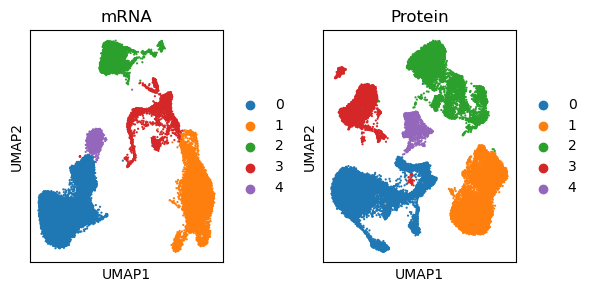

In [5]:
adata_st, adata_sp = ssmi.preprocess_cluster(adata_st, adata_sp, res_st = 0.05, res_sp = 0.01, show_fig = True, figsize = (6,3))

# **Constructing Spatial Neighborhood Graph**

------Calculating spatial graph...


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00fabbc280>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

The graph contains 480795 edges, 30672 cells.
15.6754 neighbors per cell on average.
++++++Pruning the spatial graph!++++++
480795 edges before pruning.
478382 edges after pruning.


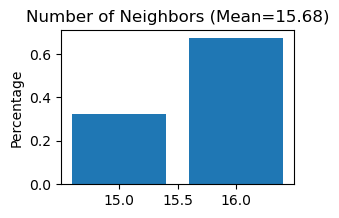

In [6]:
adata_st = ssmi.Cal_Nbrs_Net(adata_st, feat = "X_pca", k_cutoff = 15, model = "KNN")
adata_st = ssmi.prune_net(adata_st)
ssmi.Stats_Nbrs_Net(adata_st)

In [9]:
#adata_sp.obsm["X_pca"] = adata_sp.X
sc.tl.pca(adata_sp, svd_solver = 'arpack', n_comps = 15)

------Calculating spatial graph...
The graph contains 460080 edges, 30672 cells.
15.0000 neighbors per cell on average.
++++++Pruning the spatial graph!++++++
460080 edges before pruning.
459220 edges after pruning.


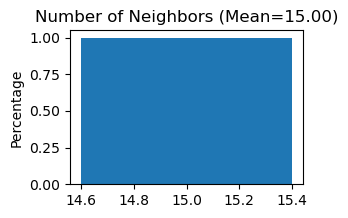

In [10]:
adata_sp = ssmi.Cal_Nbrs_Net(adata_sp, feat = "X_pca", k_cutoff = 15, model = "KNN")
adata_sp = ssmi.prune_net(adata_sp)
ssmi.Stats_Nbrs_Net(adata_sp)

  0%|                                                                                                                                                 | 0/50 [00:00<?, ?it/s]/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
  0%|                                                                                                                                                | 0/250 [00:00<?, ?it/s]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efecc29ecb0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.8494055271148682 seconds
Jaccard graph constructed in 23.753478050231934 seconds
Wrote graph to binary file in 0.48606371879577637 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.892105
After 2 runs, maximum modularity is Q = 0.89329
After 22 runs, maximum modularity is Q = 0.895083
Louvain completed 42 runs in 25.293571710586548 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 59.40838360786438 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efecc29f250>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.9388241767883301 seconds
Jaccard graph constructed in 23.26360511779785 seconds
Wrote graph to binary file in 0.5915288925170898 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914472
Louvain completed 21 runs in 9.690980195999146 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 45.069193840026855 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 20%|██████████████████████████▌                                                                                                          | 50/250 [35:51<2:18:46, 41.63s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0106803d90>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 1.5860955715179443 seconds
Jaccard graph constructed in 25.856287717819214 seconds
Wrote graph to binary file in 0.6610815525054932 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.896013
Louvain completed 21 runs in 13.503082752227783 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 51.958393812179565 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0106803d90>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.6648523807525635 seconds
Jaccard graph constructed in 23.54716944694519 seconds
Wrote graph to binary file in 0.5370368957519531 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.913153
After 7 runs, maximum modularity is Q = 0.914897
Louvain completed 27 runs in 11.747128009796143 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 45.6185188293457 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 40%|████████████████████████████████████████████████████                                                                              | 100/250 [1:11:23<1:44:13, 41.69s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efecc29f250>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 1.135833501815796 seconds
Jaccard graph constructed in 24.68707251548767 seconds
Wrote graph to binary file in 0.6343348026275635 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.896209
After 7 runs, maximum modularity is Q = 0.897479
Louvain completed 27 runs in 17.191052675247192 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 52.98281979560852 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efecc29f490>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.6553733348846436 seconds
Jaccard graph constructed in 23.228153944015503 seconds
Wrote graph to binary file in 0.5829043388366699 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.914752
Louvain completed 21 runs in 9.169819116592407 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 42.3287718296051 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 60%|██████████████████████████████████████████████████████████████████████████████                                                    | 150/250 [1:47:35<1:09:19, 41.59s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efecc29f490>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 1.633091688156128 seconds
Jaccard graph constructed in 22.88795828819275 seconds
Wrote graph to binary file in 0.6467509269714355 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.896723
Louvain completed 21 runs in 13.630958557128906 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 47.24238181114197 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0106803d90>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.809689998626709 seconds
Jaccard graph constructed in 22.871227741241455 seconds
Wrote graph to binary file in 0.5674951076507568 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.9125
After 2 runs, maximum modularity is Q = 0.914527
Louvain completed 22 runs in 9.330302000045776 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 41.711485385894775 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 200/250 [2:23:39<34:40, 41.60s/it]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efecc29c8b0>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 1.191814661026001 seconds
Jaccard graph constructed in 22.49253797531128 seconds
Wrote graph to binary file in 0.6202073097229004 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.895472
Louvain completed 21 runs in 13.389755010604858 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 45.674808979034424 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0106803d90>
Traceback (most recent call last):
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python

Neighbors computed in 0.9208633899688721 seconds
Jaccard graph constructed in 23.912733793258667 seconds
Wrote graph to binary file in 0.5381655693054199 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.913453
After 4 runs, maximum modularity is Q = 0.914695
Louvain completed 24 runs in 10.359800338745117 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 44.03322386741638 seconds


/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [2:59:34<00:00, 43.10s/it]


Ploting losses!


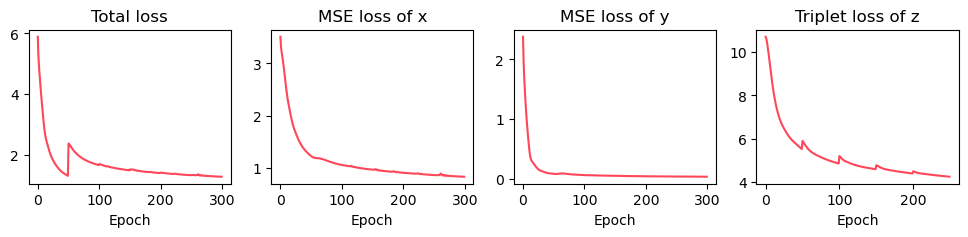

In [12]:
adata_st, adata_sp = ssmi.train(adata_st, adata_sp, hidden_dims1 = 128, hidden_dims2 = 128, out_dims = 40, cluster_update_epoch = 50, epochs_init = 50, n_epochs=300, save_reconstrction=False, sigma = 0.1, device = "cuda:0", feat1 = "PCA")

In [13]:
import matplotlib.pyplot as plt
sc.pp.neighbors(adata_st, n_neighbors = 15, use_rep='ssmi_embed')
sc.tl.umap(adata_st)

/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'ssmiDGATE clusters'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype_l2'}, xlabel='UMAP1', ylabel='UMAP2'>]

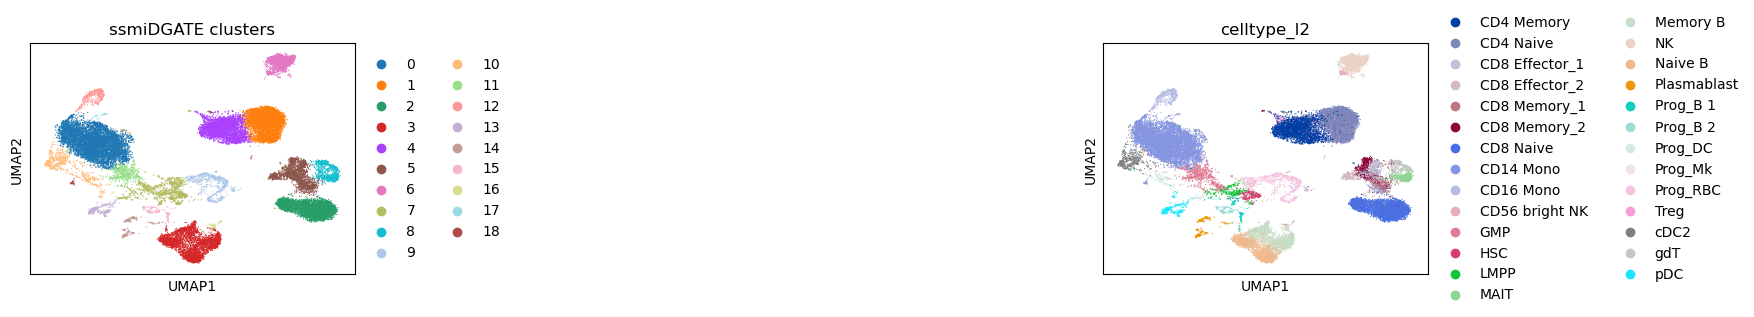

In [14]:
sc.tl.leiden(adata_st, resolution = 0.6, key_added = "ssmi_cluster")
plt.rcParams["figure.figsize"] = [3,3]
sc.pl.umap(adata_st, color=["ssmi_cluster", "celltype_l2"], s = 3, wspace = 2, show = False, title = "ssmiDGATE clusters")

In [15]:
from sklearn.metrics import adjusted_rand_score as ari_score
print('Our method, ARI = %01.3f' % ari_score(adata_st.obs["ssmi_cluster"], adata_st.obs['celltype_l2']))

Our method, ARI = 0.866


In [16]:
outdir = "/jdfssz1/ST_BIOINTEL/P20Z10200N0157/Bioinformatic_Frontier_Algorithms/05.user/liulin4/ssmi_DGATE/bmnc"
adata_st.write_h5ad(os.path.join(outdir, "adata_st_ssmi.h5ad"))
adata_sp.write_h5ad(os.path.join(outdir, "adata_sp_ssmi.h5ad"))

/hwfssz1/ST_BIOINTEL/P20Z10200N0039/06.groups/04.Algorithm_tools/liulin4/.conda/envs​/strong/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'ssmiDGATE clusters'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype_l1'}, xlabel='UMAP1', ylabel='UMAP2'>]

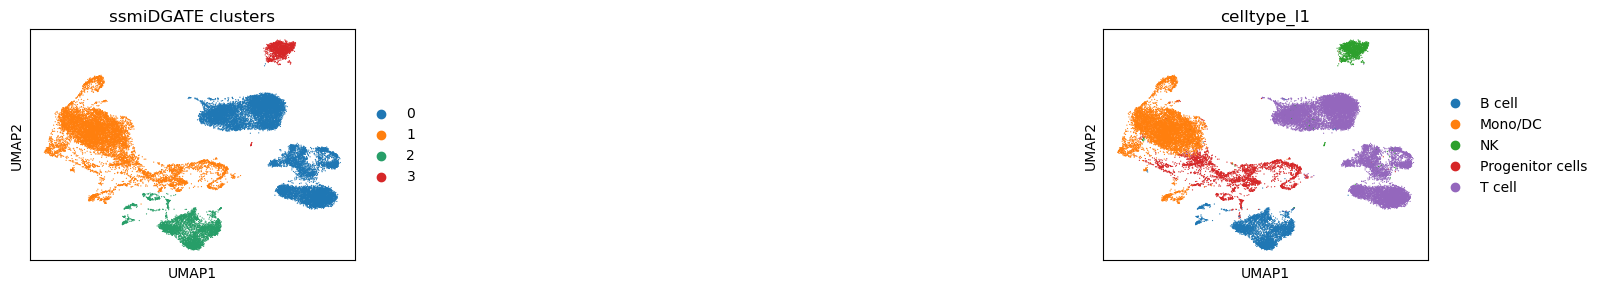

In [17]:
sc.tl.leiden(adata_st, resolution = 0.015, key_added = "ssmi_cluster")
plt.rcParams["figure.figsize"] = [3,3]
sc.pl.umap(adata_st, color=["ssmi_cluster", "celltype_l1"], s = 3, wspace = 2, show = False, title = "ssmiDGATE clusters")

In [18]:
print('Our method, ARI = %01.3f' % ari_score(adata_st.obs["ssmi_cluster"], adata_st.obs['celltype_l1']))

Our method, ARI = 0.888
